# Misquonceptions

In [121]:
# install necessary libs
#%pip install qiskit qiskit-aer qiskit-optimization qiskit-algorithms  
#%pip install qiskit_ibm_runtime


In [122]:
import math
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
import time

firstBinaryNumber = "1010"
secondBinaryNumber = "110"
start = time.time()

if len(firstBinaryNumber) < len(secondBinaryNumber):
    firstBinaryNumber, secondBinaryNumber = secondBinaryNumber, firstBinaryNumber

secondBinaryNumber = "0" * (len(firstBinaryNumber) - len(secondBinaryNumber)) + secondBinaryNumber
maxInputLength = len(firstBinaryNumber)

regA = QuantumRegister(maxInputLength, "regA")
regB = QuantumRegister(maxInputLength+1, "regB")
regC = ClassicalRegister(maxInputLength + 1, "regC")
qc = QuantumCircuit(regA, regB, regC, name="qc")

qc.draw("mpl")


for idx, val in enumerate(firstBinaryNumber):
    if val == "1":
        qc.x(regA[maxInputLength - (idx + 1)])
for idx, val in enumerate(secondBinaryNumber):
    if val == "1":
        qc.x(regB[maxInputLength - (idx + 1)])
qc.draw("mpl")


for target in range(maxInputLength, -1, -1):
    qc.h(regB[target])
    for control in range(target-1, -1, -1):
        qc.cp(math.pi*(2**(control-target)), regB[target], regB[control])
qc.barrier()
qc.draw("mpl", plot_barriers=False)


for target in range(maxInputLength):
    for control in range(maxInputLength + 1 - target):
        lam = math.pi / (2**control)
        qc.cp(lam, regA[target], regB[target+control])
qc.barrier()
qc.draw("mpl", plot_barriers=False)


for target in range(maxInputLength + 1):
    qc.h(regB[target])
    for control in range(target+1, maxInputLength + 1):
        qc.cp(-math.pi/(2**(control-target)), regB[control], regB[target])
qc.draw("mpl", plot_barriers=False)

qc.measure_all()


In [ ]:
# Account connection
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
token="Input your token here"

# for problems with connection
#QiskitRuntimeService.delete_account()
QiskitRuntimeService.save_account(channel="ibm_quantum",token=token,overwrite=True)

In [124]:
# connect to IBM

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

"""
# For simulator use: 
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2 # lot of fake providers
backend = FakeAlmadenV2()
# also comment backend above
"""

pm =generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit =pm.run(qc)

C:\Users\Petr_\AppData\Local\Temp\ipykernel_14900\2807077461.py:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


In [125]:
# Version

print(
    f"Name: {backend.name}\n",
    f"Version: {backend.version}\n",
    f"No of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
 Version: 2
 No of qubits: 127



In [126]:
# run on QM
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1000
job = sampler.run([isa_circuit])
print(f"Job ID is: {job.job_id()}")
pub_result = job.result()[0]

d:\progtest\practise\alg_think\.venv\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Job ID is: d19xtvb5z6q0008p8a9g


Counts for the meas output register: {'111000011': 3, '010011001': 3, '111111011': 9, '101011010': 15, '100010001': 3, '100000010': 2, '111001010': 10, '111011010': 12, '001011011': 11, '010101111': 2, '100110010': 2, '011000010': 4, '100000000': 1, '101111000': 4, '010010110': 2, '011011011': 12, '100111001': 7, '001111011': 6, '001000010': 4, '110111010': 9, '111000010': 2, '000011010': 10, '010001010': 9, '111110001': 1, '011101010': 8, '101100011': 5, '111000101': 1, '110111001': 7, '001111010': 11, '000001001': 3, '100011000': 9, '110010111': 2, '001101010': 7, '010111010': 10, '100011011': 8, '111100011': 4, '011001010': 8, '101011011': 5, '100101110': 1, '110001010': 3, '000110001': 3, '010011011': 8, '110011000': 4, '101111011': 6, '000010000': 1, '011111000': 3, '101011110': 2, '110001001': 3, '000011110': 4, '001001010': 9, '000111111': 1, '101101011': 9, '000101011': 6, '111111111': 2, '000101110': 2, '110111111': 1, '000010010': 2, '010110010': 1, '010100100': 1, '011011001

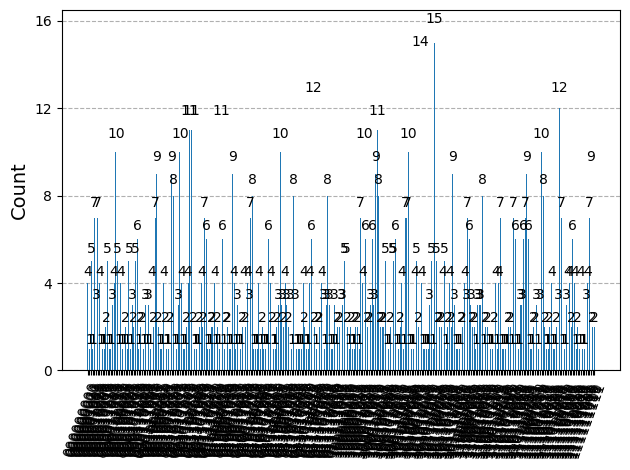

In [127]:
# visualize data
from qiskit.visualization import plot_histogram

print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")
plot_histogram(pub_result.data.meas.get_counts())